* Link to Data Source : https://www.kaggle.com/datasets/adithyabshetty100/student-performance
* Tên của Dataset: Student performance.
* Mục đích của Dataset này:
    - Để hiểu rõ hơn về hiệu suất của học sinh (điểm kiểm tra) bị ảnh hưởng như thế nào bởi các biến số khác (Giới tính, Phân loại nhóm, Trình độ học vấn của cha mẹ, Bữa trưa, khóa học luyện thi).
----

Câu 1: Viết chương trình cài đặt phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy của một thông số thống kê của một biến (đặc trưng) nào đó của dataset với:
------
• Biến (đặc trưng): do SV chọn từ dataset.\
• Thông số thống kê: giá trị trung bình (GTTB).\
• Viết hàm có:\
    • Input parameters: n (sample size), M (number of bootstrap samplings), x (confidence interval in %).\
    • Return values: phân bố lấy mẫu (bằng histogram) và dải tin cậy của GTTB của đặc trưng đã chọn.

In [1]:
#Các thư viện cần thiết
import pandas as pd

#Các thư viện dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Đọc file dataset .csv vào data frame
df = pd.read_csv('../bootstrap-sampling-method/StudentsPerformance.csv')

#Xóa tất cả các hàng chứa giá trị rỗng
df = df.dropna()

#Kích thước của data frame
df.shape

(1000, 8)

In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

=> Các giá trị rỗng đã được loại bỏ khỏi Dataset

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

* Các đặc trưng: 
    - gender: Giới tính của học sinh.
    - race/ethnicity: Phân loại học sinh theo group A/B/C/D/E.
    - parental level of education : Trình độ học vấn của phụ huynh học sinh.
    - lunch: Bữa trưa của học sinh (standard - free/reduced).
    - test preparation course: Khóa học luyện thi (completed - none).
    - math score: Điểm môn Toán (0 - 100).
    - reading score: Điểm môn Đọc (0 - 100).
    - writing score: Điểm môn Viết (0 - 100).

In [5]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [6]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [7]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [8]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [9]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

Hàm sử dụng phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy:
-----------------------------------------------------------------
Đầu vào: N, M, x.\
Trong đó: \
    + N: số quan sát có trong 1 mẫu (kích thước của 1 mẫu).\
    + M: số lượng mẫu Bootstap.\
    + x: mức ý nghĩa (%).

Ý tưởng cho phương pháp Bootstrap:
---
- Chạy một vòng lặp M lần để tạo M mẫu.
- Trong vòng lặp:
    - Với từng mẫu, ta sẽ ngẫu nhiên chọn ra N giá trị từ tập mẫu gốc và các giá trị đó có thể trùng lặp.
    - Khi đã có N giá trị ,ta sẽ tính giá GTTB (hay Mean) của N giá trị đó và được thêm vào một list.
- List này lưu M giá trị GTTB hay còn gọi là lưu phân bố lấy mẫu của tập mẫu gốc đó.
- List này sẽ còn được sử dụng cho việc tính dải tin cậy.

Cách tính dải tin cậy:
---
- Cú pháp hàm SMALL trong file Bootstrap_method.csv:
- Link to file Bootstrap_method.csv: https://view.officeapps.live.com/op/view.aspx?src=http%3A%2F%2Fbis.net.vn%2Ffiles%2Fstorage%2F20110619164310503.xls&wdOrigin=BROWSELINK\
    - SMALL(array, k)
    * Trong đó:
        - array: Là phạm vi vùng dữ liệu dạng số chứa giá trị bạn cần xác định giá trị nhỏ thứ k.
        - k: Là thứ hạng của giá trị (tính từ giá trị nhỏ nhất) trong vùng dữ liệu cần trả về.
- Áp dụng:
    * Sử dụng hàm iloc trong dataframe để tìm giá trị của vị trí có trong tập data frame
    * array sẽ là tập list được xử lý ở trên. 
    * Đối với cách tìm vị trí giới hạn dưới: 
        - k = M * x.
    * Đối với cách tìm vị trí giới hạn trên: 
        - k = M * (1 - x).

In [10]:
#Hàm phân bố lấy mẫu sử dụng phương pháp Bootstrap
def bootstrap(N, M, x):
    #Khởi tạo các biến
    upper_bound = 0
    lower_bound = 0
    mean_bootstrap = []

    for _ in range(M):
        #Tạo mẫu với kích thước là N, các giá trị có thể lặp
        new_df = df_math_score.sample(n= N, replace=True)

        #Lưu giá trị Mean tìm được của mẫu đó
        mean_bootstrap.append(float(new_df.mean(axis=0)))

    #Tạo từ điển với thuộc tính: Mean Bootstrap (Math Score)
    dict = {'Mean Bootstrap (Math Score)': mean_bootstrap}
    mean_bootstrap = pd.DataFrame(dict)

    #Sắp xếp lại các giá trị theo thuộc tính 'Mean Bootstrap (Math Score)' trong mean_bootstrap theo thứ tự tăng dần
    sorted_df = mean_bootstrap.sort_values(by='Mean Bootstrap (Math Score)', ascending=True)
    
    lower_bound = sorted_df.iloc[round(M*x)] #Tính vị trí giới hạn dưới
    upper_bound = sorted_df.iloc[round(M*(1-x))] #Tính vị trí giới hạn trên
    mean_line = sorted_df.mean() #Tính vị trí của mean

    return mean_bootstrap, lower_bound, upper_bound, mean_line


Xuất đồ thị Histogram - phân bố lấy mẫu với dải tin cậy của GTTB của đặc trưng
------------------------------------------------------------

Sử dụng đặc trưng là 'math score' trong datasets để thực hiện

Giới hạn dưới: 64.77
Giới hạn trên: 67.44
Mean: 66.1


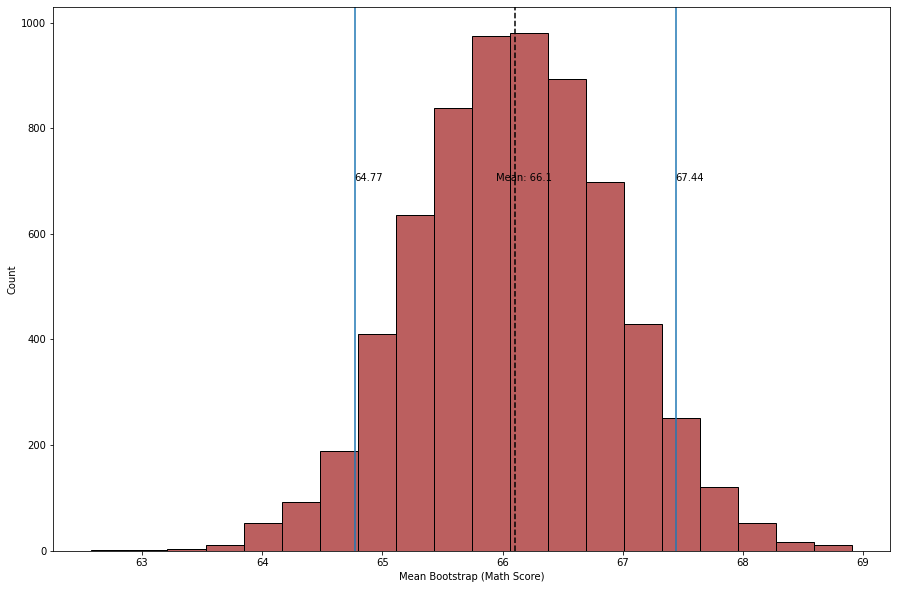

In [11]:
#Lấy tất cả record có trong dataset (gồm 1000 records) với đặc trưng (biến) là 'math score'
df_math_score = df['math score']

#Gọi hàm bootstrap()
mean_bootstrap, lower_bound, upper_bound, mean_line = bootstrap(333,6666,0.05) # tương úng với n, M, x%
#Các tham số n, M, x% tham khảo cách lấy trong file Bootstrap_method.csv (10,201,0.05)

#Histogram
plt.figure(figsize=(15,10))
sns.histplot(mean_bootstrap['Mean Bootstrap (Math Score)'] ,color = 'brown', bins=20)

#Khoảng tin cậy
lower_bound = float("{:.2f}".format(float(lower_bound)))
upper_bound = float( "{:.2f}".format(float(upper_bound)))
mean_line = float( "{:.2f}".format(float(mean_line)))

#In ra các giá trị
print('Giới hạn dưới: ' + str(lower_bound))
print('Giới hạn trên: '  + str(upper_bound))
print('Mean: '  + str(mean_line))

#Vẽ các biên
plt.axvline(lower_bound, 0,20)
plt.axvline(upper_bound, 0,20)
plt.axvline(mean_line, 0,20, color = 'k', linestyle = '--')

plt.text(lower_bound, 700, str(lower_bound), fontsize=10)
plt.text(upper_bound, 700, str(upper_bound), fontsize=10)
plt.text(mean_line-0.15, 700, "Mean: " + str(mean_line), fontsize=10)
plt.show()

Câu 2:
Dựa trên cùng dataset với Câu 1, viết chương trình xuất ra và thuyết trình các thống kê mô 
tả quan trọng của các biến, các mối quan hệ giữa các biến, quy luật tiềm ẩn của dataset có 
thể quan sát nhờ các công cụ trực quan hoá dữ liệu (ví dụ: scatter plot, heat/cluster map, 
linear model plot,…).
--------

So sánh các điểm số với các đặc trưng còn lại
---------------------

Điểm 3 môn với đặc trưng về Giới tính 'gender':

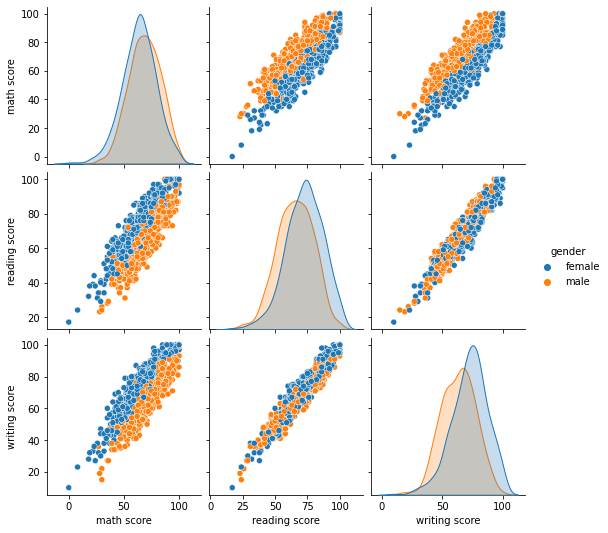

In [12]:
sns.pairplot(df, hue='gender')

* Nhận xét:
    1. Điểm môn Toán của các học sinh nam cao hơn so với học sinh nữ.
    2. Điểm môn Đọc và Viết của các học sinh nữ tốt hơn so với học sinh nam.\
=> Tổng thể thì các học sinh nữ cho ra kết quả làm bài tốt hơn do có điểm số tốt ở 2 môn Đọc, Viết.

Thêm đặc trưng về tổng điểm của 3 môn để thống kê ngắn gọn và tổng quát

In [13]:
#Thêm 1 đặc trưng về tổng điểm của 3 môn
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


So sánh tổng điểm của các học sinh với các đặc trưng còn lại (lunch, test preparation course, parental level of education, race/ethnicity):

<AxesSubplot:title={'center':'ethnicity'}, xlabel='race/ethnicity', ylabel='total score'>

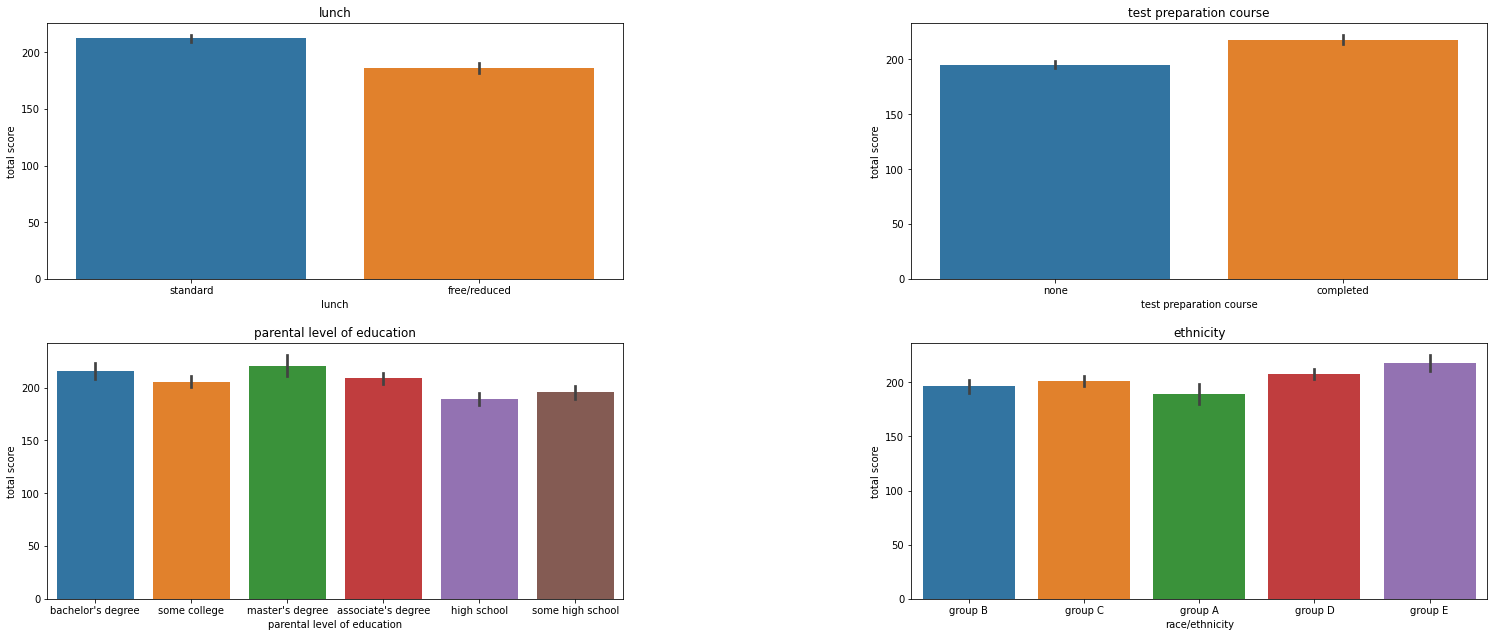

In [14]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,hspace=0.25,wspace=0.5)

plt.subplot(221)
plt.title("lunch")
sns.barplot(x ='lunch', y = 'total score', data= df)

plt.subplot(222)
plt.title("test preparation course")
sns.barplot(x='test preparation course', y='total score', data=df)

plt.subplot(223)
plt.title("parental level of education")
sns.barplot(x='parental level of education', y='total score', data=df)

plt.subplot(224)
plt.title("ethnicity")
sns.barplot(x='race/ethnicity', y='total score', data=df)


* Nhận xét:
    1. Với đồ thị 'lunch':
        - Các học sinh có tổng điểm tốt hơn khi có bữa ăn trưa tiêu chuẩn thay vì bữa ăn trưa miễn phí hoặc không ăn.\
    => Bữa ăn trưa cũng ảnh hưởng tới sức khỏe và chất lượng làm bài của học sinh.
    2. Với đồ thị 'test preparation course':
        - Các học sinh có tổng điểm tốt hơn khi hoàn thành khóa học luyện thi và ngược lại.\
        => Hoàn thành các khóa học luyện thi mang lại điểm số tốt hơn.
    3. Với đồ thị 'parental level of education':
        - Các học sinh với cha mẹ có trình độ học vấn là 'master's degree' có tổng điểm là cao nhất.
        - Với 'high school' là thấp nhất.\
        => Cha mẹ giáo dục, quan tâm con cái nhiều thì trẻ em càng có trình độ học vấn cao.
    4. Với đồ thị 'ethnicity':
        - Các học sinh ở 'group E' có tổng điểm tốt nhất so với các group còn lại.
        - 'group A' có tổng điểm thấp nhất\
            => Tổng điểm của các học sinh được cải thiện theo thứ tự group A -> B -> C -> D -> E.
    



So sánh tương quan giữa các đặc trưng
------

Với các phần thống kê so sánh ở trên, em có qui ước cho các giá trị của đặc trưng như sau:
1. 'gender':
    - Do học sinh nữ (female) có tổng điểm 3 môn tốt hơn, nên gán giá trị '1': male và '2': female. (xếp từ thấp lên cao)

In [15]:
df['gender'] = df['gender'].map({'male': 1, 'female':2})
df[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,2,group B,bachelor's degree,standard,none,72,72,74,218
1,2,group C,some college,standard,completed,69,90,88,247
2,2,group B,master's degree,standard,none,90,95,93,278


2. 'race/ethnicity':
    - Dựa vào đồ thị 'ethnicity', gán các giá trị cho group A -> B -> C -> D -> E tương ứng là 1, 2, 3, 4, 5.

In [16]:
df['race/ethnicity'] = df['race/ethnicity'].map({'group A': 1, 'group B': 2,
                                                'group C': 3, 'group D': 4,
                                                'group E': 5})
df[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,2,2,bachelor's degree,standard,none,72,72,74,218
1,2,3,some college,standard,completed,69,90,88,247
2,2,2,master's degree,standard,none,90,95,93,278


3. 'parental level of education':
    - Dựa vào đồ thị 'parental level of education', gán các giá trị lần lượt 1 từ đến 6 theo tổng điểm tăng dần.

In [17]:
df['parental level of education'] = df['parental level of education'].map({
                                    'high school': 1, 'some high school': 2,
                                    'some college': 3, "associate's degree": 4,
                                    "bachelor's degree": 5, "master's degree": 6})
df[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,2,2,5,standard,none,72,72,74,218
1,2,3,3,standard,completed,69,90,88,247
2,2,2,6,standard,none,90,95,93,278


4. 'lunch':
    - Dựa vào đồ thị 'lunch', 'standard' cho thống kê tổng điểm cao nhất nên gán giá trị: 2 và gán 'free/reduced': 1.

In [18]:
df['lunch'] = df['lunch'].map({'free/reduced': 1, 'standard' : 2})
df[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,2,2,5,2,none,72,72,74,218
1,2,3,3,2,completed,69,90,88,247
2,2,2,6,2,none,90,95,93,278


5. 'test preparation course':
    - Dựa vào đồ thị 'test preparation course', 'completed' cho thống kê tổng điểm cao nhất nên gán giá trị: 2 và gán 'none': 1.

In [19]:
df['test preparation course'] = df['test preparation course'].map({'none': 1, 'completed': 2})
df[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,2,2,5,2,1,72,72,74,218
1,2,3,3,2,2,69,90,88,247
2,2,2,6,2,1,90,95,93,278


Tính sự tương quan giữa các đặc trưng:

In [20]:
df_corr = df.corr()
df_corr


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
gender,1.000000,0.001502,0.051255,-0.021372,-0.006028,-0.167982,0.244313,0.301225,0.130861
race/ethnicity,0.001502,1.000000,0.094115,0.046563,0.017508,0.216415,0.145253,0.165691,0.185168
parental level of education,0.051255,0.094115,1.000000,-0.018780,0.031177,0.171332,0.210623,0.257498,0.224117
lunch,-0.021372,0.046563,-0.018780,1.000000,-0.017044,0.350877,0.229560,0.245769,0.290064
test preparation course,-0.006028,0.017508,0.031177,-0.017044,1.000000,0.177702,0.241780,0.312946,0.256710
math score,-0.167982,0.216415,0.171332,0.350877,0.177702,1.000000,0.817580,0.802642,0.918746
reading score,0.244313,0.145253,0.210623,0.229560,0.241780,0.817580,1.000000,0.954598,0.970331
writing score,0.301225,0.165691,0.257498,0.245769,0.312946,0.802642,0.954598,1.000000,0.965667
total score,0.130861,0.185168,0.224117,0.290064,0.256710,0.918746,0.970331,0.965667,1.000000


<AxesSubplot:>

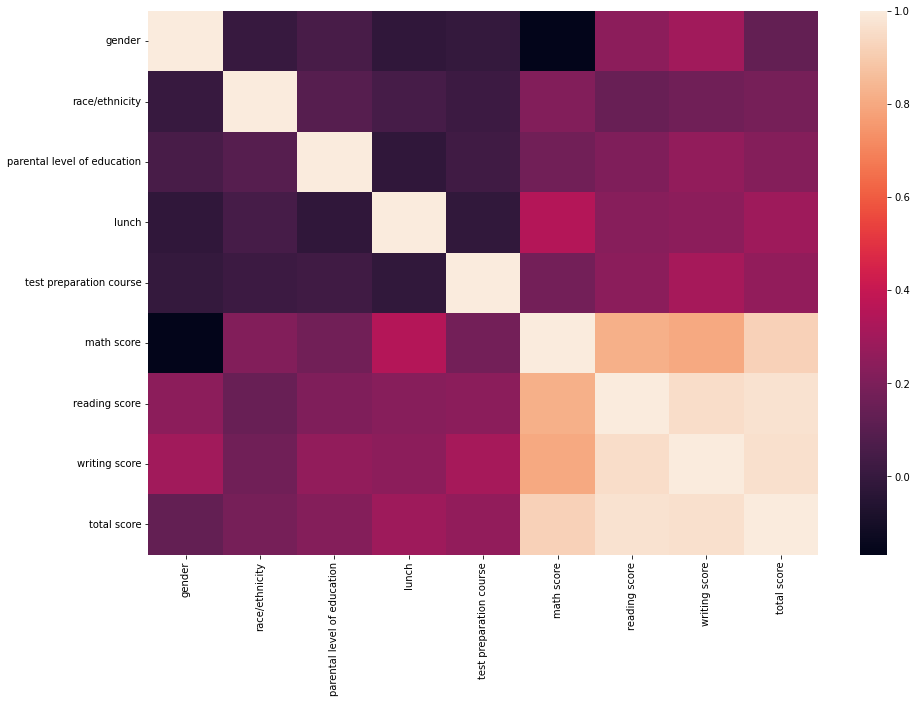

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr)

In [22]:
df_corr['total score'].sort_values(ascending=False)

total score                    1.000000
reading score                  0.970331
writing score                  0.965667
math score                     0.918746
lunch                          0.290064
test preparation course        0.256710
parental level of education    0.224117
race/ethnicity                 0.185168
gender                         0.130861
Name: total score, dtype: float64

* Quy luật tiềm ẩn giữa các đặc trưng dựa vào ma trận tương quan heatmap trên:
-----
    - Học sinh làm tốt bài kiểm tra Đọc thì thực hiện tốt ngay cả trong bài kiểm tra Viết.
    - Nếu điểm Đọc của một học sinh cao, thì điểm Viết có khả năng cao cũng như điểm Toán.
    - Các đặc trưng 'race/ethnicity' và 'lunch' ảnh hưởng đến điểm Toán nhiều hơn điểm Đọc và điểm Viết.
    - Đặc trưng 'parental level of education' ảnh hưởng đến điểm Đọc và điểm Viết nhiều hơn điểm Toán.
    - Các đặc trưng ảnh hưởng đến tổng điểm (total score) lần lượt theo tầm quan trọng là: 'lunch', 'test preparation course', 'parental level of education'.

* KẾT LUẬN:
    - Với những quy luật tiềm ẩn như trên, phụ huynh học sinh cũng như là các em có thể hiểu rõ hơn về những tính chất quan trọng để có thể giúp các em cải thiện hơn về mặt điểm số.